In [1]:
import time
import numpy as np
from qiskit import IBMQ
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute, compile
from qiskit import Aer
from qiskit.tools.jupyter import *
from qiskit.providers.jobstatus import JobStatus, JOB_FINAL_STATES
# import basic plot tools
from qiskit.tools.visualization import plot_histogram, circuit_drawer

In [2]:
provider0 = IBMQ.load_account()
provider1 = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backends = provider0.backends()
#backend = provider0.get_backend('ibmqx4')
backend = provider0.get_backend('ibmq_16_melbourne')

print("The backend is " + backend.name())

The backend is ibmq_16_melbourne


In [2]:
simulator = Aer.get_backend('qasm_simulator')

# 3-5

In [3]:
q2 = QuantumRegister(3)
c2 = ClassicalRegister(3)
qc2 = QuantumCircuit(q2, c2)
qc2.h(q2[0])
qc2.cx(q2[0], q2[1])
qc2.ccx(q2[0],q2[1],q2[2])

qc2.measure(q2, c2)
layout = [3, 4, 5]
print(layout)

[3, 4, 5]


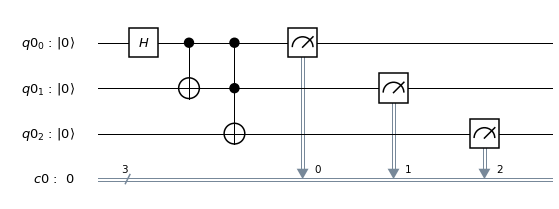

In [4]:
style = { 'cregbundle' : 'True' }
qc2.draw(output='mpl', style = style)

# Simulation

In [6]:
backend=simulator
job_sim = execute(qc2, backend=backend, shots=8192)
counts_sim = job_sim.result().get_counts(qc2)

In [7]:
print(counts_sim)

{'000': 4072, '111': 4120}


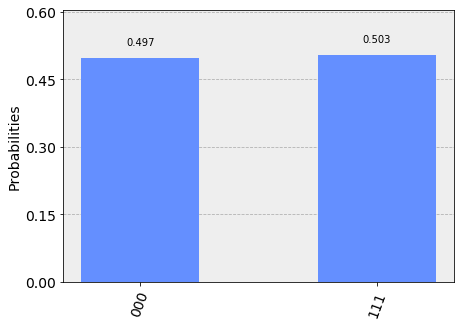

In [9]:
plot_histogram(counts_sim)

In [27]:
qbs = {}
qbs1 = sum((v for k, v in counts_sim.items() if k.endswith('000')), 0)
qbs2 = sum((v for k, v in counts_sim.items() if k.endswith('001')), 0)
qbs3 = sum((v for k, v in counts_sim.items() if k.endswith('010')), 0)
qbs4 = sum((v for k, v in counts_sim.items() if k.endswith('011')), 0)
qbs5 = sum((v for k, v in counts_sim.items() if k.endswith('100')), 0)
qbs6 = sum((v for k, v in counts_sim.items() if k.endswith('101')), 0)
qbs7 = sum((v for k, v in counts_sim.items() if k.endswith('110')), 0)
qbs8 = sum((v for k, v in counts_sim.items() if k.endswith('111')), 0)

qbs.update([('000', qbs1),
           ('001', qbs2),
           ('010', qbs3),
           ('011', qbs4),
           ('100', qbs5), 
           ('101', qbs6),
           ('110', qbs7), 
           ('111', qbs8)])

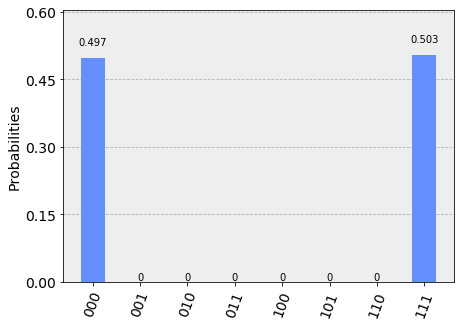

In [28]:
plot_histogram(qbs)

# IBMQ16

In [11]:
start_time = time.time()

In [12]:
job_2 = execute(qc2, backend=provider0.get_backend('ibmq_16_melbourne'), initial_layout=layout, shots=8192, max_credits=3)
counts_2 = job_2.result().get_counts(qc2)

In [13]:
qb35 = {}
qb351 = sum((v for k, v in counts_2.items() if k.endswith('0')), 0)
qb352 = sum((v for k, v in counts_2.items() if k.endswith('1')), 0)
qb353 = sum((v for k, v in counts_2.items() if k.endswith(('00' , '01'))), 0)
qb354 = sum((v for k, v in counts_2.items() if k.endswith(('10' , '11'))), 0)
qb355 = sum((v for k, v in counts_2.items() if k.startswith('0')), 0)
qb356 = sum((v for k, v in counts_2.items() if k.startswith('1')), 0)

qb35.update([('qb30', qb351),
             ('qb31', qb352),
             ('qb40', qb353),
             ('qb41', qb354),
             ('qb50', qb355), 
             ('qb51', qb356)])

In [14]:
print(counts_2)

{'110': 1373, '001': 440, '100': 717, '111': 377, '000': 1513, '011': 563, '101': 254, '010': 2955}


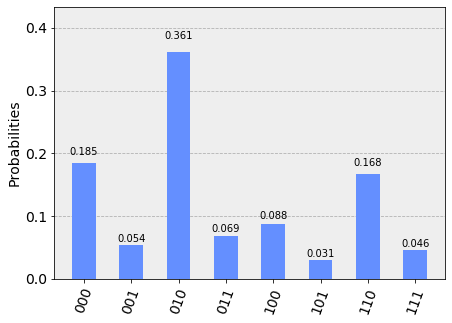

In [15]:
plot_histogram(counts_2) #raw data

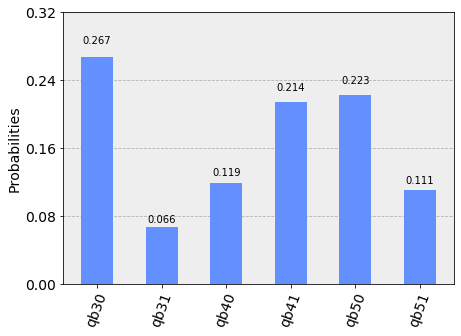

In [16]:
plot_histogram(qb35)

In [17]:
print("--- %s seconds ---" % round(time.time() - start_time), 2)

--- 1127 seconds --- 2


In [18]:
#while job_list:
#    for job in job_list:
#        if job.status() in JOB_FINAL_STATES:
#            counts = job.result().get_counts()
#            print(counts)
#            job_list.remove(job)

In [19]:
#job_exp = execute(qc, backend=backend, initial_layout=layout, shots=8192)

#start_time = time.time()
#job_status = job_exp.status()
#while job_status not in JOB_FINAL_STATES:
#    print(f'Status @ {time.time()-start_time:0.0f} s: {job_status.name},'
#          f' est. queue position: {job_exp.queue_position()}')
#    time.sleep(10)
#job_status = job_exp.status()

#counts = job_exp.result().get_counts(qc)

In [20]:
#print(counts)

In [21]:
#plot_histogram(counts)

In [22]:
#job_sim = execute(qc, backend=simulator, shots=8192)
#counts_sim = job_sim.result().get_counts(qc)

In [23]:
#print("\nTotal count for simulator:",counts_sim)

In [24]:
#plot_histogram(counts_sim)